<a href="https://colab.research.google.com/github/Parkgyutae0401/Park-Gyutae/blob/main/%EC%A3%BC%EC%8B%9D%EC%98%88%EC%B8%A1_%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import warnings
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
import numpy as np

warnings.filterwarnings('ignore')

In [5]:
# finance datareader로 부터 데이터 불러오기
data = fdr.DataReader('KS11')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-11,705.989990,709.479980,704.429993,704.679993,704.679993,28000.0
1996-12-12,705.109985,706.010010,688.739990,689.380005,689.380005,25900.0
1996-12-13,690.440002,695.719971,677.640015,689.070007,689.070007,26500.0
1996-12-16,686.969971,686.969971,667.710022,673.919983,673.919983,22800.0
1996-12-17,675.349976,680.090027,660.390015,663.349976,663.349976,31600.0
...,...,...,...,...,...,...
2023-03-29,2432.629883,2443.949951,2428.610107,2443.919922,2443.919922,496600.0
2023-03-30,2452.969971,2462.699951,2439.429932,2453.159912,2453.159912,621300.0
2023-03-31,2459.939941,2481.239990,2456.540039,2476.860107,2476.860107,721300.0


In [6]:
#종가만 추출
close = data['Close']

#비교 기준 구간
start_date = '2021-09-01'
end_date = '2021-09-16'

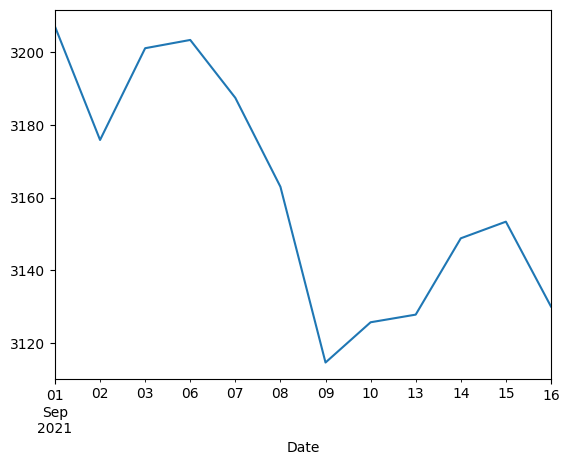

In [12]:
#기준 구간 시계열 차트
close[start_date:end_date].plot();

In [10]:
base = close[start_date:end_date]
base

Date
2021-09-01    3207.020020
2021-09-02    3175.850098
2021-09-03    3201.060059
2021-09-06    3203.330078
2021-09-07    3187.419922
2021-09-08    3162.989990
2021-09-09    3114.699951
2021-09-10    3125.760010
2021-09-13    3127.860107
2021-09-14    3148.830078
2021-09-15    3153.399902
2021-09-16    3130.090088
Name: Close, dtype: float64

In [14]:
base_norm = (base - base.min()) / (base.max()-base.min())
base_norm

Date
2021-09-01    1.000000
2021-09-02    0.662371
2021-09-03    0.935442
2021-09-06    0.960031
2021-09-07    0.787694
2021-09-08    0.523072
2021-09-09    0.000000
2021-09-10    0.119801
2021-09-13    0.142549
2021-09-14    0.369693
2021-09-15    0.419193
2021-09-16    0.166704
Name: Close, dtype: float64

In [15]:
#윈도우 사이즈
window_size = len(base)

#예측 기간
next_date = 5

#검색횟수
moving_cnt = len(close) - window_size - next_date - 1

In [16]:
def cosine_similarity(x,y):
  return np.dot(x,y) / (np,sqrt(np.dot(x,x)*np.sqrt(np.dot(x,y))))